In [11]:
import pandas as pd

pd.read_csv with encoding='utf8'. That setting would have less problem when we manipulate our data.

In [12]:
industry_sector_df = pd.read_csv('course_python_forFinance dataset/stock_data_forPractice/industry_sector.csv',encoding='utf8')
industry_sector_df

,Name,Sector,Price,EPS
0,Apple Inc,Information Technology,170.12,9.20
1,Abbvie Inc,Health Care,93.29,5.31
2,Abbott Laboratories,Health Care,55.28,2.41
3,Accenture Plc,Information Technology,145.30,5.91
4,Allergan Plc,Health Care,171.81,15.42
...,...,...,...,...
97,Verizon Communications Inc,Telecommunications,45.85,3.75
98,Walgreens Boots Alliance,Consumer Staples,70.25,5.10
99,Wells Fargo & Company,Financials,54.02,4.14
100,Wal-Mart Stores,Consumer Staples,96.08,4.36


### Show all dataframe columns by .columns

In [13]:
industry_sector_df.columns

Index(['Name', 'Sector', 'Price', 'EPS'], dtype='object')

- .values : to get numpy array with head() that limit the amount of records

In [14]:
stock_price = industry_sector_df['Price'].values
EPS = industry_sector_df['EPS'].values
print('Stock Price: ', industry_sector_df['Price'].head().values)
print('EPS: ', industry_sector_df['EPS'].head().values)

Stock Price:  [170.12  93.29  55.28 145.3  171.81]
EPS:  [ 9.2   5.31  2.41  5.91 15.42]


### Price to Earnings Ratio, PE Ration本益比
- PER = Stock Price / EPS(Earnings Per Share)
- PER is also equal to Market Capitalization / Profit After Tax

In [90]:
PER = stock_price / EPS
PER

array([  18.49130435,   17.56873823,   22.93775934,   24.58544839,
         11.14202335,   23.70517928,   14.8011782 ,   13.42845787,
        285.99492386,   17.99233716,   27.18358974,   15.25714286,
         14.44742937,   15.19596542,   21.99767981,   20.43243243,
         28.81875994,   13.8477842 ,   24.75135135,   16.075     ,
        215.0310559 ,   25.14285714,   17.88613861,   11.64379947,
       2494.5       ,   29.41924399,   16.76497696,   12.29071804,
         32.16806723,   24.02313625,   18.07368421,   19.91235955,
         19.43169399,   23.31007752,   16.66129032,    7.20833333,
         34.51637765,   18.2829555 ,   15.84375   ,   16.21875   ,
         19.73187686,   14.44354839,    7.47703549,    7.22778675,
         34.09708738,   34.6196853 ,   12.3984375 ,   56.94520548,
         24.44396552,   21.30071942,   11.08345534,   14.11320755,
         19.40336134,   14.20461095,   22.63764045,   26.21538462,
         24.12698413,   20.28606357,   24.60141509,   18.76267

### 計算Price to Earnings Ratio/PER本益比
- PER = Stock price / 每股盈餘EPS
- PER = Market Capitalization市值 / Profit after tax稅後淨利

### Add new column for PER we had calculated

In [91]:
industry_sector_df['PER'] = PER
industry_sector_df.head()

,Name,Sector,Price,EPS,PER
0,Apple Inc,Information Technology,170.12,9.20,18.491304
1,Abbvie Inc,Health Care,93.29,5.31,17.568738
2,Abbott Laboratories,Health Care,55.28,2.41,22.937759
3,Accenture Plc,Information Technology,145.30,5.91,24.585448
4,Allergan Plc,Health Care,171.81,15.42,11.142023


### Show statistic summary by df.describe()
- This summary is for setting histogram parameters

In [17]:
industry_sector_df.describe()

,Price,EPS,PER
count,102.000000,102.000000,102.000000
mean,150.500686,6.485294,51.283190
std,240.768463,8.577741,247.155439
min,12.110000,0.020000,7.208333
25%,54.335000,2.885000,15.211260
50%,88.295000,4.405000,20.353279
75%,151.032500,6.565000,24.550078
max,1762.230000,74.450000,2494.500000


### Visualization with histogram

In [134]:
import  matplotlib.pyplot as plt
import math
import numpy as np

### Using column PER to create Histogram

In [98]:
n = len(industry_sector_df['PER'])
np_array_PER = industry_sector_df['PER'].values

### Calculating the Bin Size based on Freedman Diaconis Rule
- Freedman Diaconis rule is more robust for outlier because it consider both record scale and the number of records.

In [99]:
Q3 = industry_sector_df['PER'].quantile(.75)
Q1 = industry_sector_df['PER'].quantile(.25)
IQR = Q3 - Q1
freedman_bin_size = 2*(IQR/(len(np_array_PER)**(1/3)))
freedman_bin_size

3.9975003639470916

In [102]:
freedman_theNumberOf_bins = int((n/freedman_bin_size) + 1)
freedman_theNumberOf_bins

26

### Calculating the Bin Size based on Sturges' Rule

In [103]:
n = len(np_array_PER)
sturges_bin_size = round(1 + (math.log(n,10)/math.log(2,10)))
sturges_bin_size

8

In [104]:
sturges_theNumberOf_bins = int((n/sturges_bin_size) + 1)
sturges_theNumberOf_bins

13

### Some notices about matplotlib.plot
 - plt.style.use('ggplot'): this style shows the diagram more clear because of its color theme
 - plt.close(): it is very important step. Don't forget this, then the other cell's plot would be a new begin.

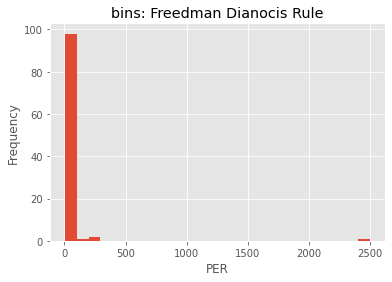

In [121]:
plt.style.use('ggplot')
plt.hist(np_array_PER, bins=freedman_theNumberOf_bins)
plt.title('bins: Freedman Dianocis Rule')
plt.ylabel('Frequency')
plt.xlabel('PER')
plt.show()
plt.close() # don't forget to close the plot

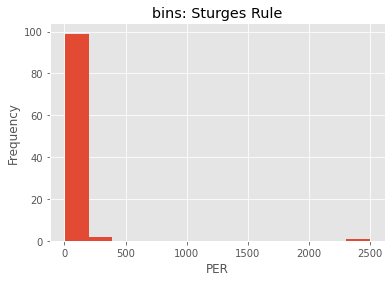

In [114]:
plt.style.use('ggplot')
plt.hist(np_array_PER, bins=sturges_theNumberOf_bins)
plt.title('bins: Sturges Rule')
plt.ylabel('Frequency')
plt.xlabel('PER')
plt.show()
plt.close()

### Detecting and Removing Outliers
- We can intuitively find outliers are at > 2000 PER from above 2 graph.
- Or we can use IQR to find outliers
    - If the records' value of PER > Q3 + 1.5*IQR OR PER < Q1 - 1.5*IQR, these records are outliers.

Using hist to find the outliers' range and creating a filter based on the range.

In [ ]:
np_array_PER = industry_sector_df['PER'].values
outlier_fromHist_filter = np_array_PER < 2000

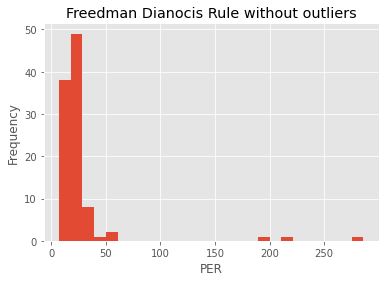

In [120]:
plt.style.use('ggplot')
plt.hist(np_array_PER[outlier_fromHist_filter], bins=freedman_theNumberOf_bins)
plt.title('Freedman Dianocis Rule without outliers')
plt.ylabel('Frequency')
plt.xlabel('PER')
plt.show()
plt.close()

In [138]:
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
outlier_fromIQR_filter_upper = np_array_PER < upper_bound
outlier_fromIQR_filter_lower = np_array_PER > lower_bound
print(outlier_fromIQR_filter_upper)
print(outlier_fromIQR_filter_lower)
outlier_filterIQR = [outlier_fromIQR_filter_upper[i] and outlier_fromIQR_filter_lower[i] for i, e in enumerate(outlier_fromIQR_filter_upper)]
print(outlier_filterIQR)

[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True False  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True 

### IQR to remove outlier has better performance
- In this diagram with IQR filter, it shows better visualization for this dataset.

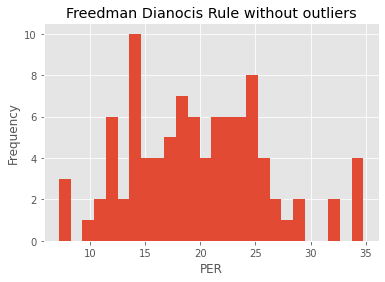

In [140]:
plt.style.use('ggplot')
plt.hist(np_array_PER[outlier_filterIQR], bins=freedman_theNumberOf_bins)
plt.title('Freedman Dianocis Rule without outliers')
plt.ylabel('Frequency')
plt.xlabel('PER')
plt.show()
plt.close()

### Labeling records of outliers and Getting them
- Although these records are noises or outliers, they still have values to do some analysis. We can get insights from them.

In [147]:
detect_outlier = [not e for e in outlier_filterIQR]
outlier_records = industry_sector_df[detect_outlier]
outlier_records

,Name,Sector,Price,EPS,PER
8,Amazon.Com Inc.,Consumer Discretionary,1126.82,3.94,285.994924
20,Charter Communicatio,Consumer Discretionary,346.20,1.61,215.031056
24,Conocophillips,Energy,49.89,0.02,2494.500000
47,Halliburton Company,Energy,41.57,0.73,56.945205
74,Occidental Petroleum Corp,Energy,68.17,0.35,194.771429
80,Paypal Holdings,Information Technology,76.55,1.40,54.678571
84,Schlumberger N.V.,Energy,61.53,1.29,47.697674
